Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

Do not edit or insert code into the test cells as all you insert will be overwritten by the automated testing code.

---

**Question 9**: One challenge in astronomy is to find the trajectory of a light object in the presence of two much heavier bodies whose motion is not influenced by the light object. The typical case would be the motion of a satellite in the Earth-Moon system.

If all three objects move in the $x-y$ plane, the motion of the light object is described by dimensionless, second-order  ODE's $$\frac{d^{2}x(t)}{dt^{2}}=x(t)+2\,\frac{dy(t)}{dt}-\frac{(1-\mu)\,(x(t)+\mu)}{r^{3}}-\frac{\mu\,(x(t)-1+\mu)}{s^{3}}$$ and $$\frac{d^{2}y(t)}{dt^{2}}=y(t)-2\,\frac{dx(t)}{dt}-\frac{(1-\mu)\,y(t)}{r^{3}}-\frac{\mu\,y(t)}{s^{3}},$$ where $\mu$ is the ratio of masses of the heavy objects, $x(t)$ and $y(t)$ are the coordinates of the light object and $$r=\sqrt{(x(t)+\mu)^{2}+y(t)^{2}}\quad{};\;s=\sqrt{(x(t)-1+\mu)^{2}+y(t)^{2}}.$$

**Data**: Consider the time interval $0\leq{}t\leq{}18$ and $\mu=0.012277471$ (Moon to Earth ratio) and initial conditions $x(0)=0.994$, $y(0)=0$, $\frac{dx(t=0)}{dt}=0$ and $\frac{dy(0)}{dt}=-2.0015851$.

**Task**: Write a function `satellite(init, time, mu)` to solve the ODE's. The array of initial conditions, the time array and the parameter $\mu$ shall be input to the function. Return the full output of the `odeint` function.

Create three plots: **(a)** draw the trajectory coordinate $y(t)$ against $x(t)$, 

**(b)** draw both curves $x(t)$ and $y(t)$ as a function of time on the same plot with a legend and 

**(c)** draw the speeds $dy(t)/dt$ against $dx(t)/dt$. 

All figures should show appropriate axes labels and be drawn as a row$=1$, column$=3$ multi-figure plot.

/home/ubuntu/.local/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


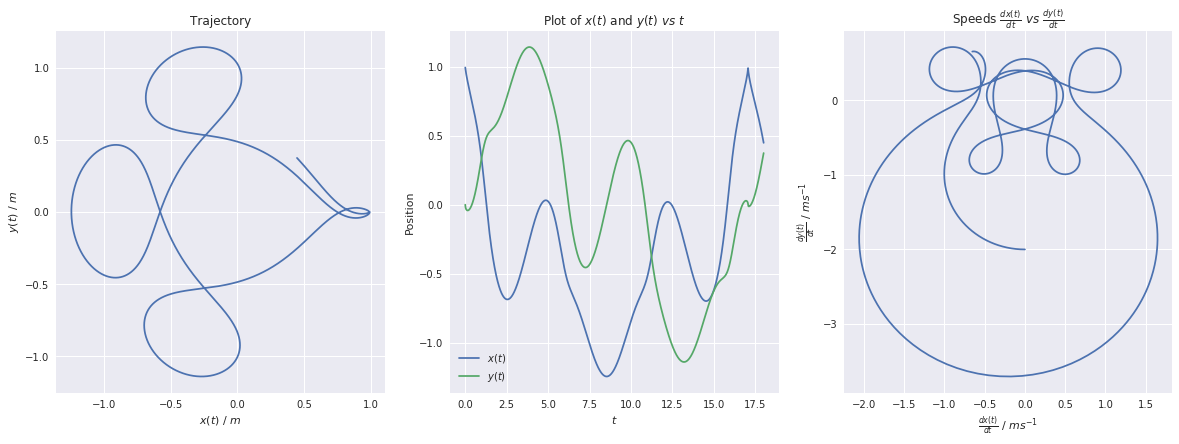

In [1]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

initial_conditions = np.array((0.994, 0, 0, -2.0015851))
# this setting is a bit of a kernel-killer on weaker
# machines - runs fine for me but see the commented line
# if it's playing up
time_values = np.linspace(0, 18, 500000)
# time_values = np.linspace(0, 18, 1000)
mu = 0.01227471


def ode(t, params, mu):
    """Function modelling ordinary differential equations, as
    described above.
    
    Parameters:
    -----------
    """
    x, p, y, q = params[0], params[1], params[2], params[3]
    r = np.sqrt((x + mu) ** 2 + y ** 2)
    s = np.sqrt((x - 1 + mu) ** 2 + y ** 2)
    f_0 = p
    f_1 = (
        x
        + 2 * q
        - (1 - mu) * (x + mu) * r ** -3
        - mu * (x - 1 + mu) * s ** -3
    )
    f_2 = q
    f_3 = y - 2 * p - (1 - mu) * y * r ** -3 - mu * y * s ** -3
    return np.array((f_0, f_1, f_2, f_3))


def satellite(init, time, mu):
    """Wrapper for odeint that passes appropriate parameters."""
    return odeint(ode, init, time, args=(mu,), tfirst=True)


solved = satellite(initial_conditions, time_values, mu)
xvals = solved[:, 0]
yvals = solved[:, 2]

plt.style.use("seaborn")
width = 20
fig,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(width, width/3))

ax1.plot(xvals, yvals)
ax1.set_xlabel("$x(t)$ / $m$")
ax1.set_ylabel("$y(t)$ / $m$")
ax1.set_title("Trajectory")

ax2.plot(time_values, xvals, label="$x(t)$")
ax2.plot(time_values, yvals, label="$y(t)$")
ax2.set_xlabel("$t$")
ax2.set_ylabel("Position")
ax2.set_title(r"Plot of $x(t)$ and $y(t)\ vs\ t$")
ax2.legend()

ax3.plot(solved[:, 1], solved[:, 3])
ax3.set_xlabel(r"$\frac{dx(t)}{dt}$ / $ms^{-1}$")
ax3.set_ylabel(r"$\frac{dy(t)}{dt}$ / $ms^{-1}$")
ax3.set_title(r"Speeds $\frac{dx(t)}{dt}\ vs\ \frac{dy(t)}{dt}$")

plt.show()

In [2]:
# Test cell
mu = 0.01227471
init = np.array([0.994, 0.0, 0.0, -2.0015851])  # x(0), dxdt(0), y(0), dydt(0)
time = np.linspace(0, 18, 200)
answer = satellite(init, time, mu)
assert answer[10, 0] > 0.4 and answer[10, 0] < 0.41, "wrong x(t)"

In [3]:
# Test cell
assert answer[10, 1] > -0.91 and answer[10, 1] < -0.9, "wrong speed in x"
assert answer[10, 2] > 0.28 and answer[10, 2] < 0.29, "wrong y(t)"
assert answer[10, 3] > 0.7 and answer[10, 3] < 0.72, "wrong speed in y"

### Tests 3 marks; Style 1 mark; Plots - 3 marks